https://mp.weixin.qq.com/s?__biz=MzU1MjYzNjQwOQ==&mid=2247486531&idx=3&sn=23373dbc7003a9e69f9ab657c7d61571&chksm=fbfe56d5cc89dfc3229c5f3c585953f14939d0821bf6ec9288789cd7402f93e9a44a76406d71&scene=0&xtrack=1&key=e8c75d77299604ef83656a6c66f68c6fc5043d56f4469186e65835c681375f9a5e1cbdc4988e44db49101cfcfdd40b3a08e9de363c06c1d3f9259836f03365cedf0e6bc06558ee74ebd644fa9b56188d&ascene=1&uin=MjA1MjAyODkxNg%3D%3D&devicetype=Windows+10&version=62070141&lang=zh_CN&pass_ticket=%2FljxmLK3OdGy6PUNNDKy%2FPUNR5POGV%2B2r7xuqNUwneZfVrH0p0KbDlMznJxrHhgS

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### 特征重要性

In [2]:
df = pd.read_csv('../../dataset/mushrooms.csv')

In [3]:
X = df.drop(['class'],axis=1)
Y = df['class']

In [4]:
X = pd.get_dummies(X,prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)

In [5]:
X2 = StandardScaler().fit_transform(X)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30,  random_state = 101)

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1.46875
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



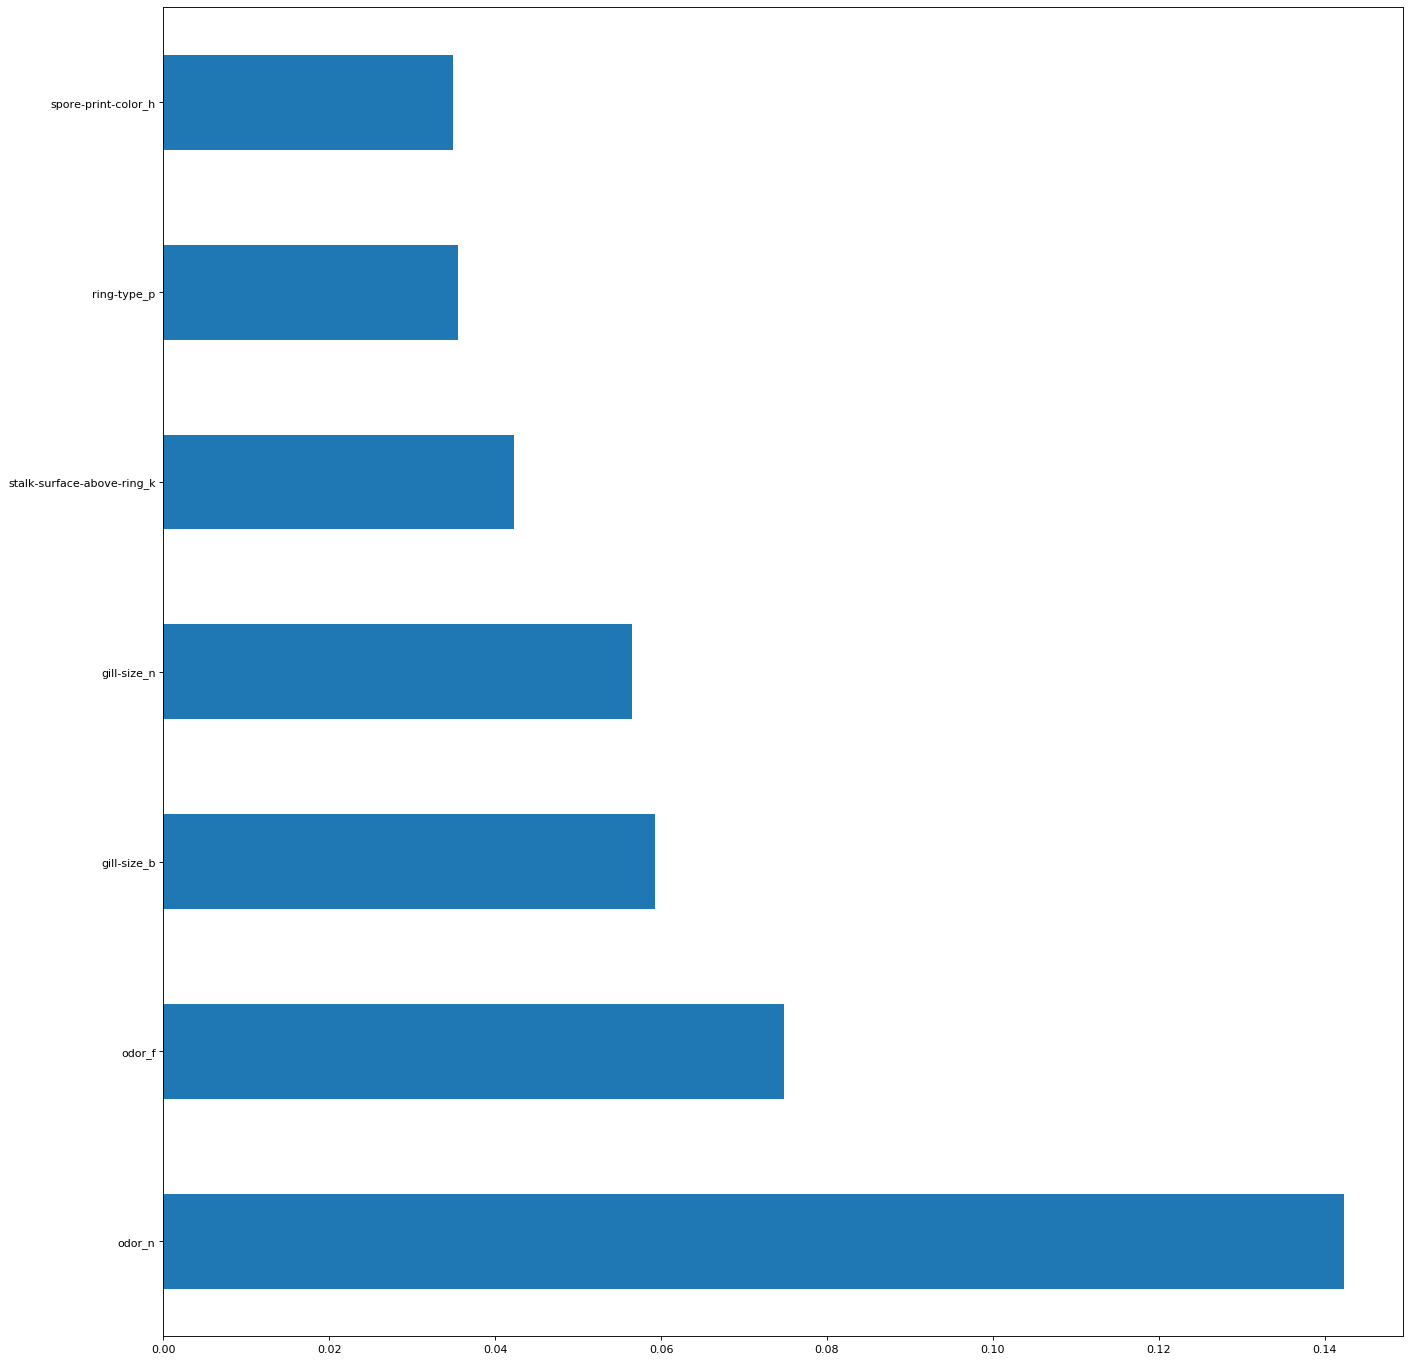

In [7]:
plt.figure(num=None,figsize=(20,22),dpi=80,facecolor='w',edgecolor='k')
feat_importance = pd.Series(trainedforest.feature_importances_,index=X.columns)
feat_importance.nlargest(7).plot(kind='barh')

In [8]:
# 尝试使用前4个来训练我们的模型
X_Reduced = X[['odor_n','odor_f', 'gill-size_n','gill-size_b']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30,  random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.890625
[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

   micro avg       0.97      0.97      0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



In [9]:
# 通过可视化一个训练过的决策树来理解如何进行特征选择
start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

0.015625
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [10]:
import graphviz
from sklearn.tree import DecisionTreeClassifier,export_graphviz

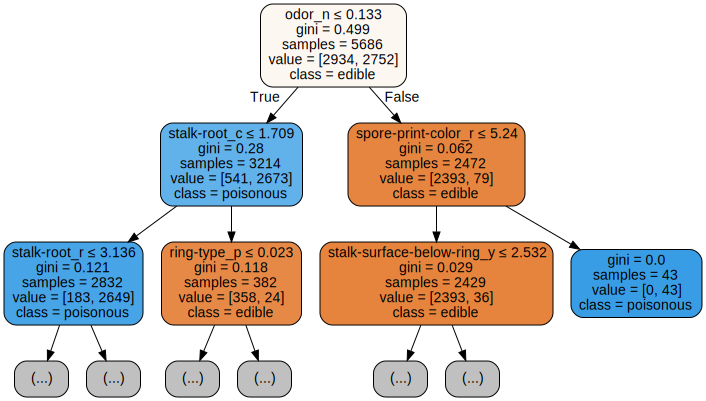

In [11]:
data = export_graphviz(trainedtree,out_file=None,feature_names= X.columns,
        class_names=['edible', 'poisonous'], 
        filled=True, rounded=True, 
        max_depth=2,
        special_characters=True)
graph = graphviz.Source(data)
graph

### 递归特征消除（RFE）
rfe.support 返回一个布尔列表，其中 true 表示一个特征被视为重要，false 表示一个特征不重要

In [12]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_estimators=700)
rfe = RFE(model,4)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print(time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test,Y_Test))

134.703125
Overall Accuracy using RFE:  0.9675963904840033


### SelectFromModel

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_Train,Y_Train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_Train)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, Y_Train)
print(time.process_time() - start)
Selected_X_Test = model.transform(X_Test)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.015625
0.984375
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### 相关矩阵分析

In [16]:
Numeric_df = pd.DataFrame(X)
Numeric_df['Y'] = Y
corr= Numeric_df.corr()
corr_y = abs(corr["Y"])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

bruises_f                     0.501530
bruises_t                     0.501530
gill-color_b                  0.538808
gill-size_b                   0.540024
gill-size_n                   0.540024
ring-type_p                   0.540469
stalk-surface-below-ring_k    0.573524
stalk-surface-above-ring_k    0.587658
odor_f                        0.623842
odor_n                        0.785557
Y                             1.000000
Name: Y, dtype: float64

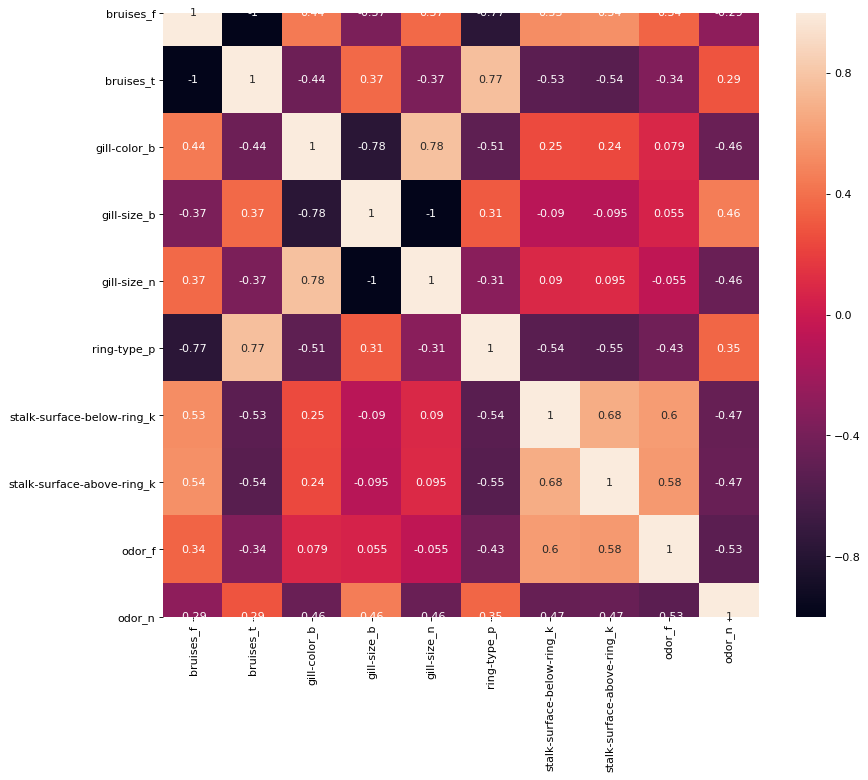

In [18]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
corr2 = Numeric_df[['bruises_f' , 'bruises_t' , 'gill-color_b' , 'gill-size_b' ,  'gill-size_n' , 'ring-type_p' , 'stalk-surface-below-ring_k' ,  'stalk-surface-above-ring_k' , 'odor_f', 'odor_n']].corr()
sns.heatmap(corr2, annot=True, fmt=".2g")

### 单变量选择
提供不同类型的评分函数：
Classification = chi2, f_classif, mutual_info_classif

Regression = f_regression, mutual_info_regression

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
Scaled_X = min_max_scaler.fit_transform(X2)
X_new = SelectKBest(chi2,k=2).fit_transform(Scaled_X,Y)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_new, Y, test_size = 0.30,  random_state = 101)
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

0.796875
[[1015  259]
 [  41 1123]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1274
           1       0.81      0.96      0.88      1164

   micro avg       0.88      0.88      0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



### 套索回归
当使用套索回归时，如果输入特征的系数对我们的机器学习模型训练没有积极的贡献，则它们会缩小，这样，一些特征可能会被自动丢弃，即将它们的系数指定为0

In [21]:
from sklearn.linear_model import LassoCV
regr = LassoCV(cv=5, random_state=101)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:-1]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))

LassoCV Best Alpha Scored:  0.0003964898084478826
LassoCV Model Accuracy:  0.9971840741918596
Variables Eliminated:  73
Variables Kept:  44


C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

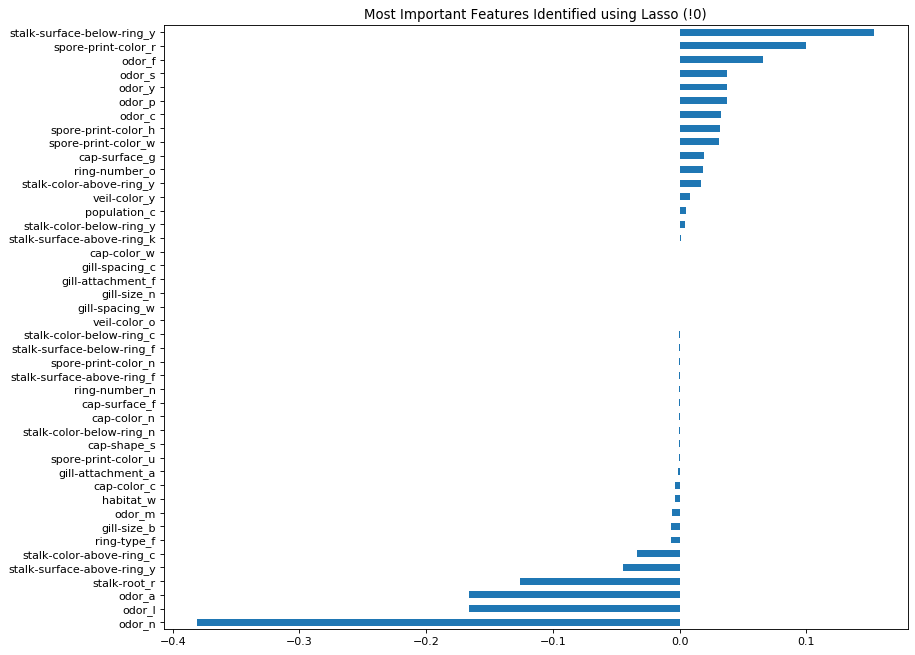

In [22]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")